# Color Identification

In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
img_path = 'image4.jpg'
csv_path = 'colors.csv'

In [14]:
index = ['color','color_name','hex','R','G','B']
df = pd.read_csv(csv_path, names=index,header = None)

In [15]:
df

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255
...,...,...,...,...,...,...
860,yellow_orange,Yellow Orange,#ffae42,255,174,66
861,yellow_process,Yellow (Process),#ffef00,255,239,0
862,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
863,zaffre,Zaffre,#0014a8,0,20,168


Shape: (1167, 1600, 3)


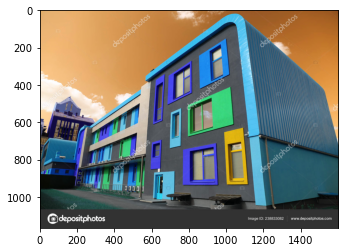

In [16]:
img = cv2.imread(img_path)
plt.imshow(img)
print("Shape: {}".format(img.shape))


In [17]:
image = cv2.resize(img, (600, 400), interpolation = cv2.INTER_AREA)

In [18]:
clicked = False
r = g = b = xpos = ypos = 0

In [19]:
def get_color_name(R,G,B):
    minimum = 1000
    for i in range(len(df)):
        d = abs(R-int(df.loc[i,'R'])) + abs(G-int(df.loc[i,'G'])) + abs(B-int(df.loc[i,'B']))
        if d <= minimum:
            minimum = d
            cname = df.loc[i,'color_name']
    return cname

In [22]:
def draw_function(event,x,y,flags,params):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global clicked,r,g,b,xpos,ypos
        clicked = True
        xpos = x
        ypos = y
        b,g,r = image[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

In [23]:
cv2.namedWindow('image')

In [24]:
cv2.setMouseCallback('image', draw_function)

In [25]:
while True:
    cv2.imshow('image',image)
    if clicked:
        #Making a colored strip to show our text on
        cv2.rectangle(image, (20,20), (600,60),(b,g,r), -1)

        #Getting the color name and storing in text variable
        text = get_color_name(r,g,b) + '  R='+ str(r) + 'G=' + str(g) + 'B=' + str(b)

        #Putting the text onto the strip that we created above
        cv2.putText(image,text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)


        if r+g+b >= 600: #If the colors are dim
            cv2.putText(image,text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA) #We want our text to be black

    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.waitKey(0)
cv2.destroyAllWindows()